In [1]:
import cv2
import PIL
from tools import display, display_inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'example.jpg'
img = cv2.imread(path)
window = 'img_1'

In [3]:
w, h, c = img.shape
scaler = 3
img = cv2.resize(img, (w // scaler, h // scaler))

In [4]:
img.shape

(356, 426, 3)

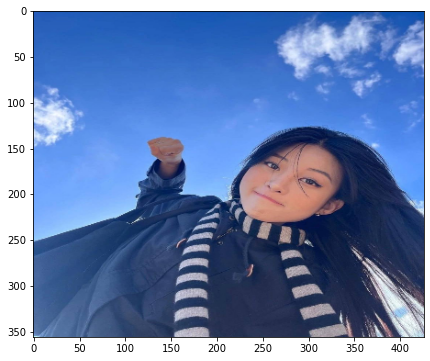

In [5]:
display_inline(img)

t1

In [6]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

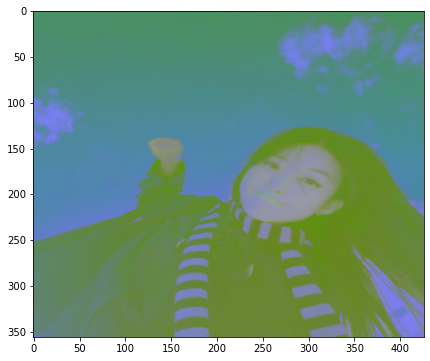

In [7]:
display_inline(img_lab)

In [8]:
hist_hue = cv2.calcHist([img_hsv], [0], None, [256], [0, 256])
hist_lab = cv2.calcHist([img_lab], [0], None, [256], [0, 256])

In [9]:
def display_hist(hist):
    plt.figure(figsize=(10, 6))
    plt.hist(hist, bins=100)

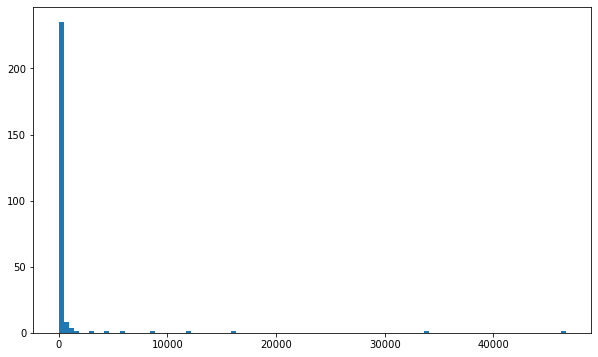

In [10]:
display_hist(hist_hue)
plt.show()

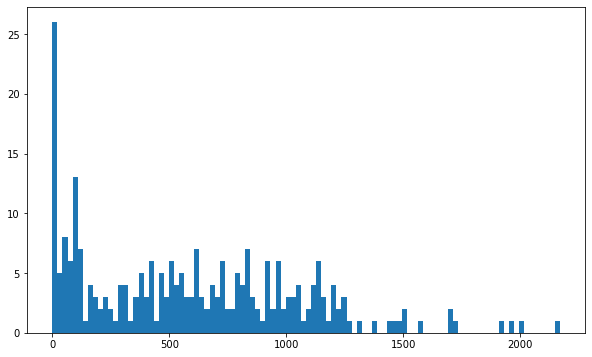

In [11]:
display_hist(hist_lab)
plt.show()

t2

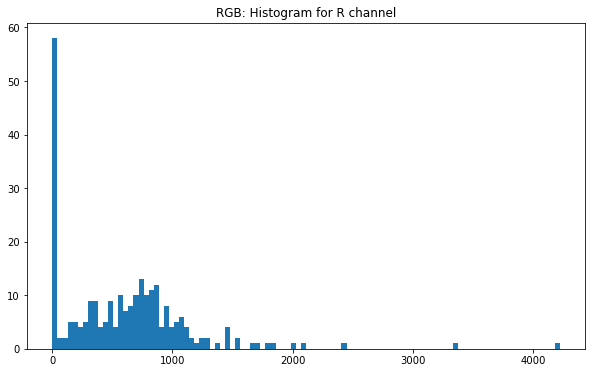

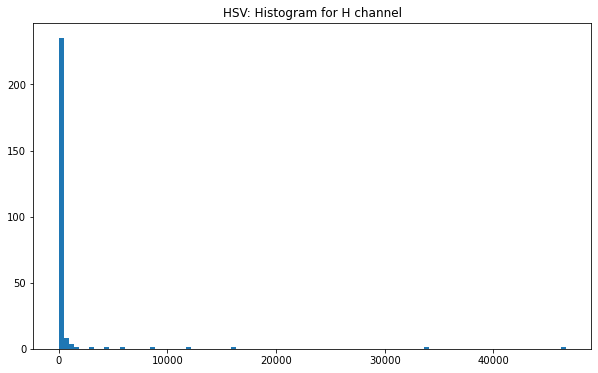

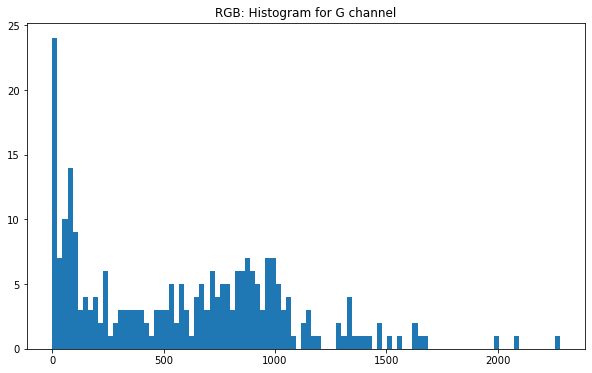

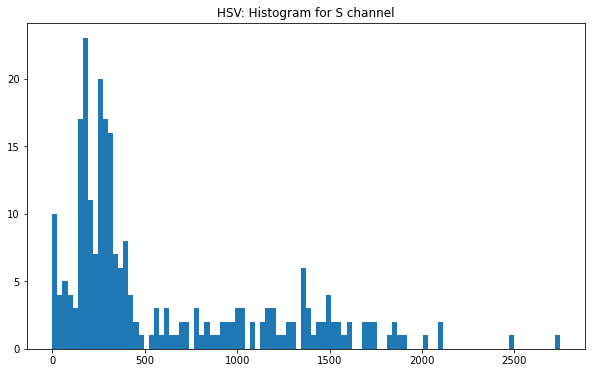

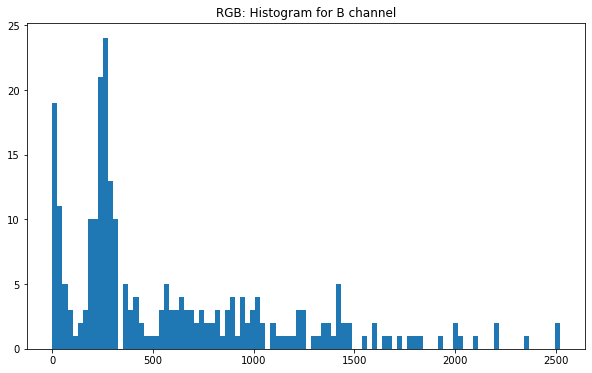

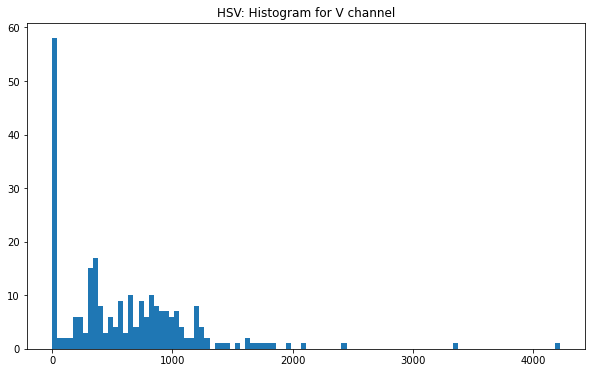

In [12]:
for i in range(3):
    hist_rgb = cv2.calcHist([img], [i], None, [256], [0, 256])
    display_hist(hist_rgb)
    plt.title(f'RGB: Histogram for {["R", "G", "B"][i]} channel')
    plt.show()
    
    hist_hsv = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
    display_hist(hist_hsv)
    plt.title(f'HSV: Histogram for {["H", "S", "V"][i]} channel')
    plt.show()
    

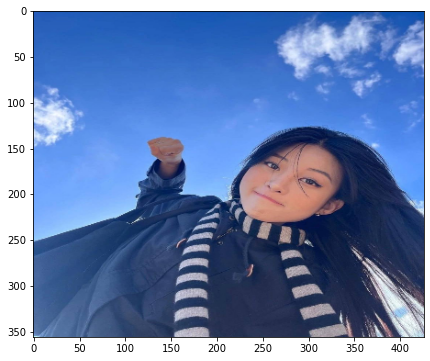

In [13]:
display_inline(img)

t3

In [14]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [15]:
hist_grey = cv2.calcHist(img_grey, [0], None, [256], [0, 256])

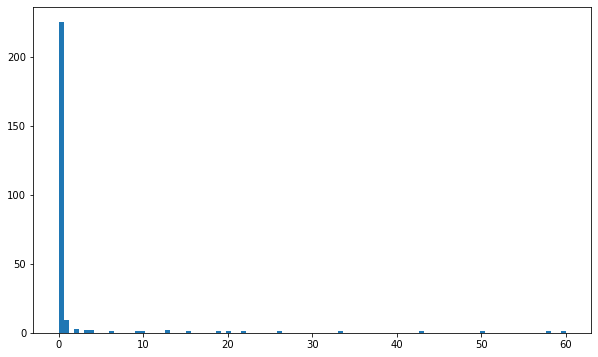

In [16]:
display_hist(hist_grey)
plt.show()

In [17]:
equ_grey = cv2.equalizeHist(img_grey)
res_grey = np.vstack([img_grey, equ_grey])

In [18]:
# cv2.imshow(window, equ_grey)
# cv2.imshow(window, res_grey)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [19]:
hist_grey_equ = cv2.calcHist(equ_grey, [0], None, [256], [0, 256])

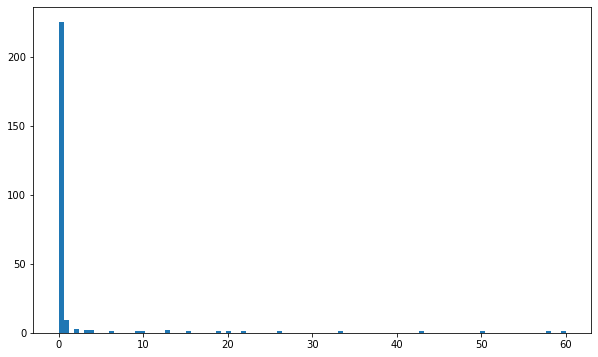

In [20]:
display_hist(hist_grey_equ)
plt.show()

In [21]:
clahe8 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
res_clahe8 = clahe8.apply(img_grey)

clahe4 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
res_clahe4 = clahe4.apply(img_grey)

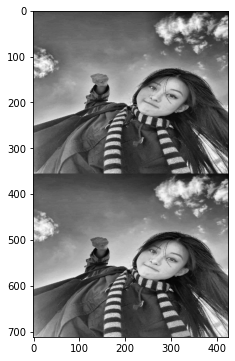

In [22]:
display_inline(np.vstack([res_clahe8, res_clahe4]), grey=True)

In [23]:
hist_clahe8 = cv2.calcHist(res_clahe8, [0], None, [256], [0, 256])
hist_clahe4 = cv2.calcHist(res_clahe4, [0], None, [256], [0, 256])

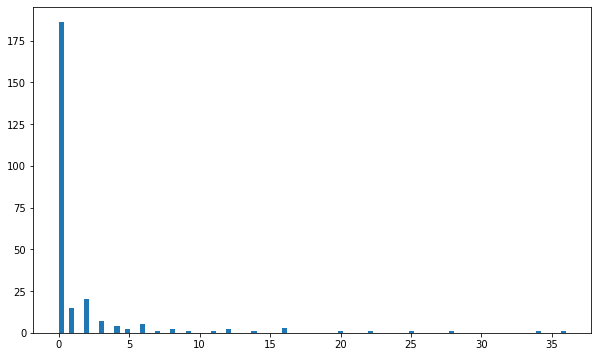

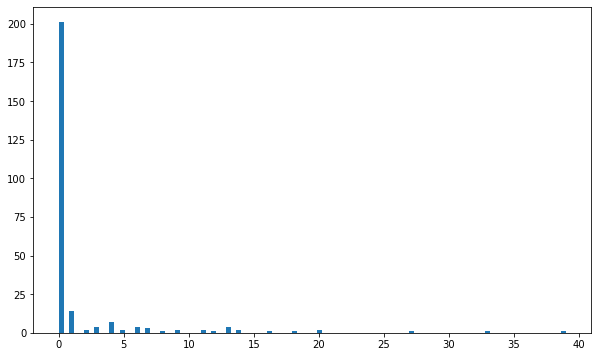

In [24]:
display_hist(hist_clahe8)
plt.show()

display_hist(hist_clahe4)
plt.show()

t4

In [25]:
ret, binary = cv2.threshold(img_grey, 50, 255, cv2.THRESH_BINARY)

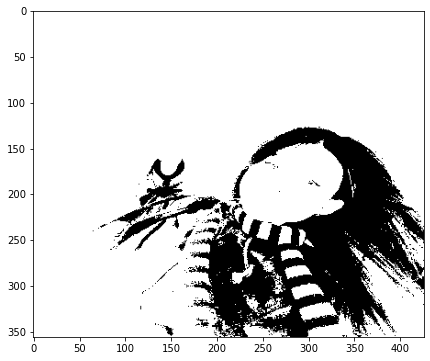

In [26]:
display_inline(binary, grey=True)

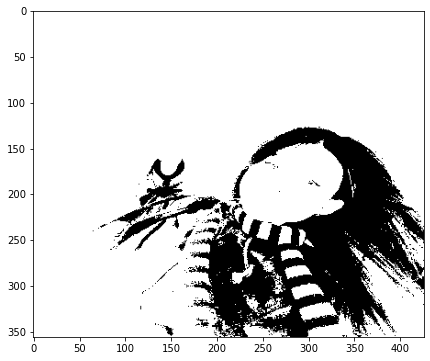

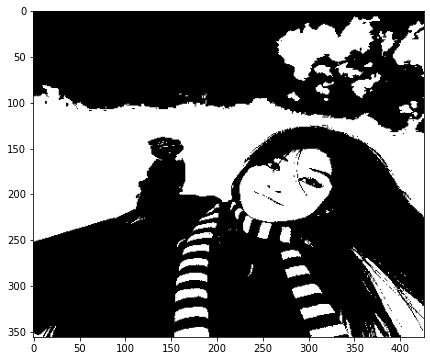

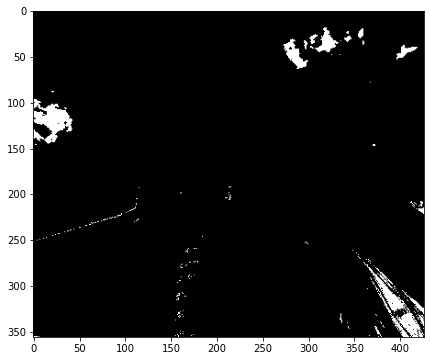

In [27]:
for threshold_val in (50, 127, 200):
    ret, binary = cv2.threshold(img_grey, threshold_val, 255, cv2.THRESH_BINARY)
    display_inline(binary, grey=True)


t5

In [28]:
ret, otsu_binary = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

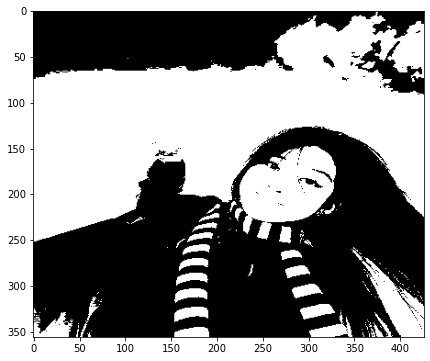

In [29]:
display_inline(otsu_binary, grey=True)

t6

In [30]:
ret, mean_binary = cv2.threshold(img_grey, 0, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
ret, gaussian_binary = cv2.threshold(img_grey, 0, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

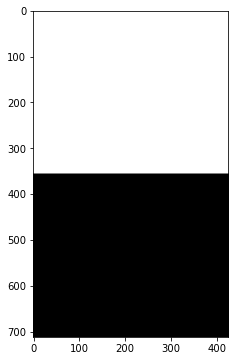

In [31]:
display_inline(np.vstack([mean_binary, gaussian_binary]), grey=True)

t7

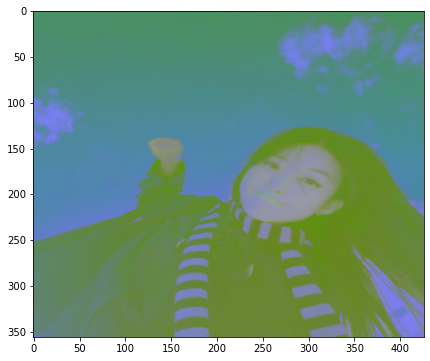

In [32]:
display_inline(img_lab)

In [33]:
from sklearn.cluster import KMeans

In [57]:
k = 2
kmeans = KMeans(n_clusters=k)
lables = kmeans.fit_predict(img_lab.reshape((-1, 3)))

In [58]:
lables = lables.reshape((h // scaler, w // scaler))

In [63]:
img

array([[[184,  91,  36],
        [184,  91,  36],
        [184,  91,  36],
        ...,
        [176,  81,   7],
        [176,  81,   7],
        [176,  81,   7]],

       [[184,  91,  36],
        [184,  91,  36],
        [184,  91,  36],
        ...,
        [176,  81,   7],
        [176,  81,   7],
        [176,  81,   7]],

       [[185,  92,  37],
        [185,  92,  37],
        [185,  92,  37],
        ...,
        [176,  81,   7],
        [176,  81,   7],
        [176,  81,   7]],

       ...,

       [[210, 152, 114],
        [205, 147, 111],
        [198, 139, 104],
        ...,
        [229, 213, 187],
        [207, 188, 167],
        [230, 208, 190]],

       [[218, 183, 137],
        [195, 160, 114],
        [193, 155, 111],
        ...,
        [226, 209, 181],
        [233, 214, 188],
        [217, 194, 170]],

       [[246, 241, 187],
        [250, 244, 191],
        [248, 237, 187],
        ...,
        [235, 215, 189],
        [236, 214, 189],
        [220, 196, 173]]

In [62]:
lables

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
img.shape

(356, 426, 3)

In [53]:
cv2.imshow(window, lables)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:/a/opencv-python/opencv-python/opencv/modules/highgui/src/precomp.hpp:157: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [52]:
display_inline(lables)

error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x6a3ea619::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


<Figure size 720x432 with 0 Axes>